In [36]:
import pandas as pd
import plotly.express as px
import matplotlib
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_excel('LamboData.xlsx')


In [12]:
df.head()


Year  Sales     Growth  Open    High    Low  Close
0  2006   2087        NaN   5.50  11.30   5.50  11.30
1  2007   2406  15.285098  11.80  26.30  11.80  23.05
2  2008   2430   0.997506  22.43  51.13  22.00  35.90
3  2009   1515 -37.654321  34.48  37.50  11.18  11.18
4  2010   1302 -14.059406  10.75  15.38   8.49  14.80

In [5]:
df.tail()

Year  Sales     Growth  Open    High    Low  Close
13  2019   8205  42.695652  16.02  20.00  16.18  19.40
14  2020   7430  -9.445460  19.41  20.83  10.68  20.83
15  2021   8405  13.122476  20.79  36.21  29.20  29.20
16  2022   9233   9.851279  31.59  31.59  15.72  15.72
17  2023  10112   9.520199  17.07  18.32  11.17  12.98

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    18 non-null     int64  
 1   Sales   18 non-null     int64  
 2   Growth  17 non-null     float64
 3   Open    18 non-null     float64
 4   High    18 non-null     float64
 5   Low     18 non-null     float64
 6   Close   18 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.1 KB


In [7]:
df.describe()

Year         Sales     Growth      Open        High        Low  \
count    18.000000     18.000000  17.000000  18.000000  18.000000  18.000000   
mean   2014.500000   4318.222222  11.785750  18.780000  24.897778  14.541111   
std       5.338539   2999.678150  21.049916   7.234203   9.508512   5.357938   
min    2006.000000   1302.000000 -37.654321   5.500000  11.300000   5.500000   
25%    2010.250000   2095.500000   1.824292  14.277500  19.685000  11.335000   
50%    2014.500000   2887.500000  10.355800  18.240000  22.080000  13.435000   
75%    2018.750000   7010.000000  23.041475  21.870000  26.927500  16.065000   
max    2023.000000  10112.000000  50.720839  34.480000  51.130000  29.200000   

           Close  
count  18.000000  
mean   19.150556  
std     6.621486  
min    11.180000  
25%    14.777500  
50%    17.735000  
75%    21.955000  
max    35.900000

In [8]:
df['Sales'].describe()

count       18.000000
mean      4318.222222
std       2999.678150
min       1302.000000
25%       2095.500000
50%       2887.500000
75%       7010.000000
max      10112.000000
Name: Sales, dtype: float64

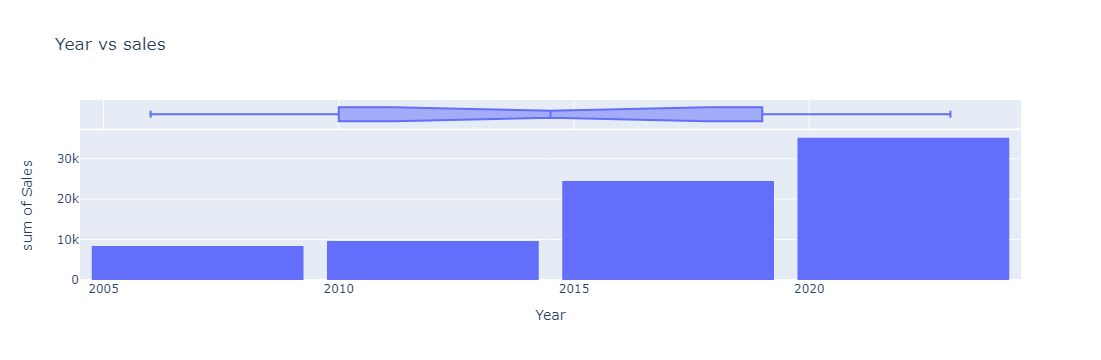

In [13]:
fig = px.histogram(df, 
                   x='Year', 
                   marginal='box',
                   y='Sales',
         
                   title='Year vs sales')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig = px.histogram(df, 
                   x='Year', 
                   marginal='box',
                   y='Growth',
         
                   title='Year vs Growth')
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
plt.title('Year vs. Growth')
sns.scatterplot(data=df, x='Year', y='Growth', alpha=0.7, s=15);

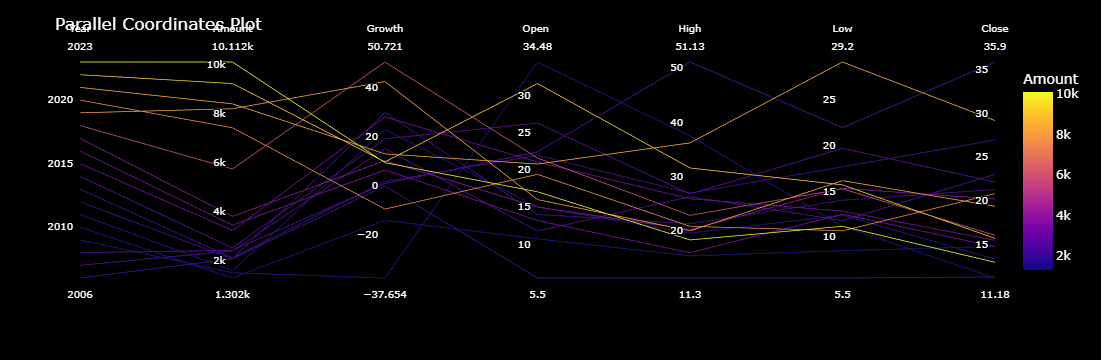

In [20]:

fig = px.parallel_coordinates(df, color='Sales', labels={"Sales": "Amount", "Growth": "Growth", "Close": "Close", "Low": "Low"})
fig.update_layout(title='Parallel Coordinates Plot', plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()


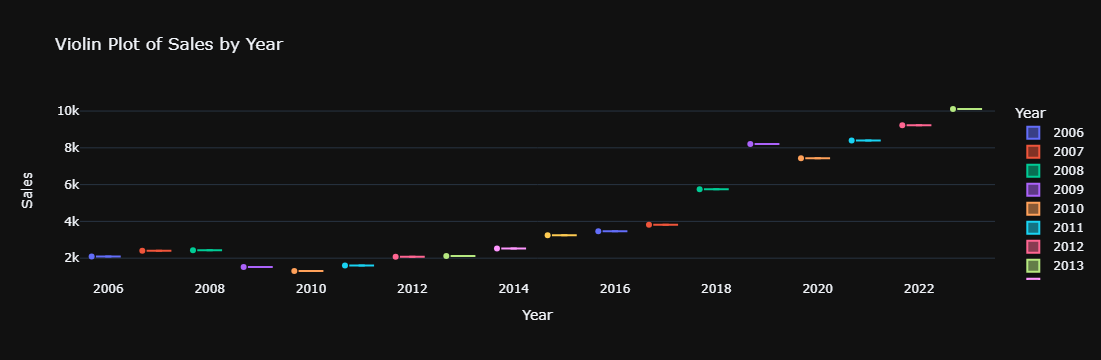

In [21]:

# 8. Violin Plot
fig = px.violin(df, y='Sales', x='Year', color='Year', title='Violin Plot of Sales by Year', template="plotly_dark", box=True, points="all")
fig.show()



In [22]:


fig = px.line_polar(df, r='Sales', theta='Year', line_close=True, title='Radar Chart of Sales by Year', template="plotly_dark")
fig.show()



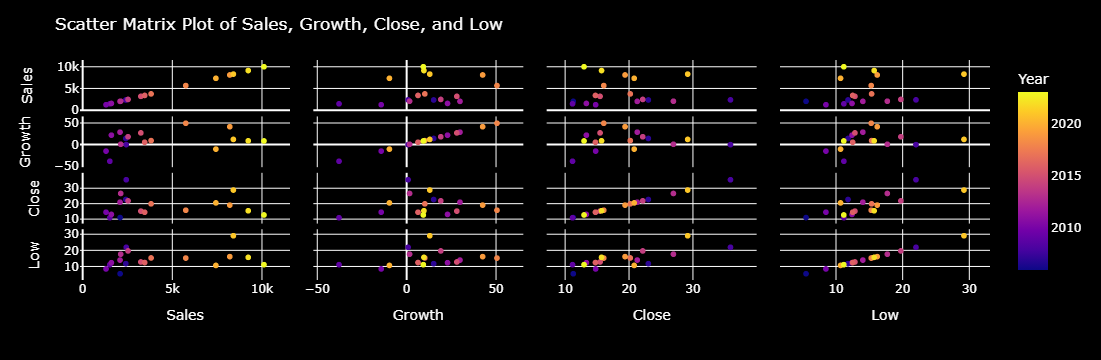

In [23]:
# 3. Scatter Matrix Plot
fig = px.scatter_matrix(df, dimensions=['Sales', 'Growth', 'Close', 'Low'], color='Year')
fig.update_layout(title='Scatter Matrix Plot of Sales, Growth, Close, and Low', plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()



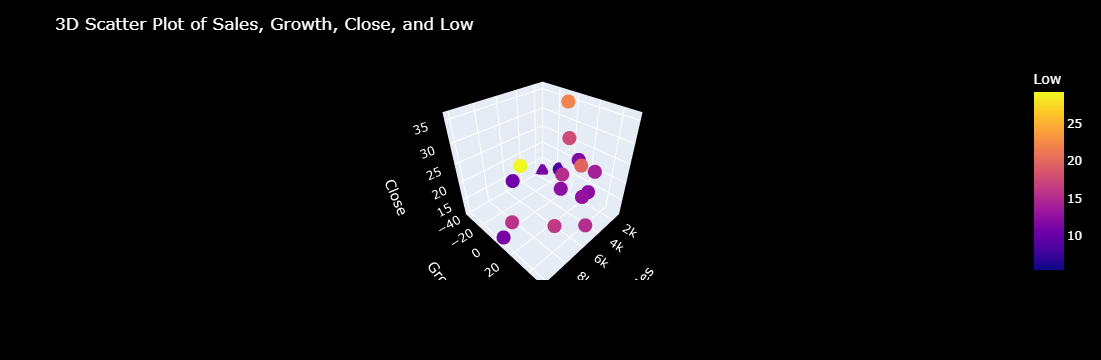

In [26]:
# 5. 3D Scatter Plot
fig = px.scatter_3d(df, x='Sales', y='Growth', z='Close', color='Low')
fig.update_layout(title='3D Scatter Plot of Sales, Growth, Close, and Low', scene=dict(xaxis_title='Sales', yaxis_title='Growth', zaxis_title='Close'), 
                  plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()



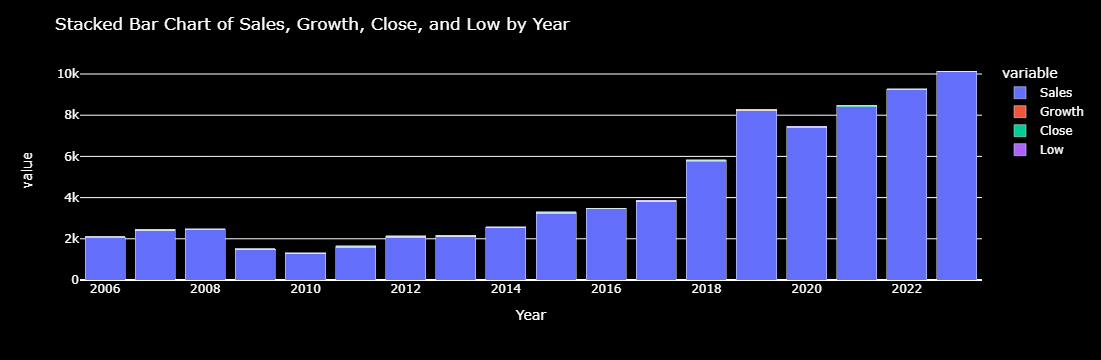

In [27]:
# 6. Stacked Bar Chart
fig = px.bar(df, x='Year', y=['Sales', 'Growth', 'Close', 'Low'], barmode='stack')
fig.update_layout(title='Stacked Bar Chart of Sales, Growth, Close, and Low by Year', plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()



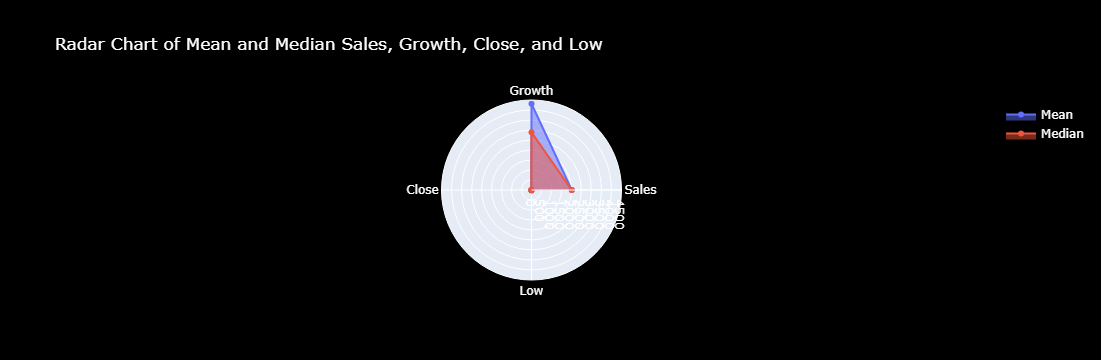

In [33]:
# 13. Radar Chart with Multiple Axes
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=df.mean(), theta=['Sales', 'Growth', 'Close', 'Low'], fill='toself', name='Mean'))
fig.add_trace(go.Scatterpolar(r=df.median(), theta=['Sales', 'Growth', 'Close', 'Low'], fill='toself', name='Median'))
fig.update_layout(title='Radar Chart of Mean and Median Sales, Growth, Close, and Low', polar=dict(radialaxis=dict(visible=True)), 
                  plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

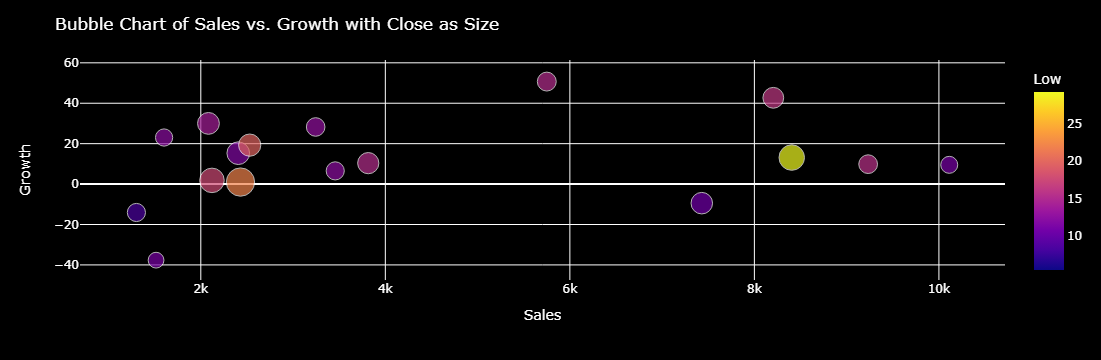

In [32]:
# 10. Bubble Chart
fig = px.scatter(df, x='Sales', y='Growth', size='Close', color='Low')
fig.update_layout(title='Bubble Chart of Sales vs. Growth with Close as Size', plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()



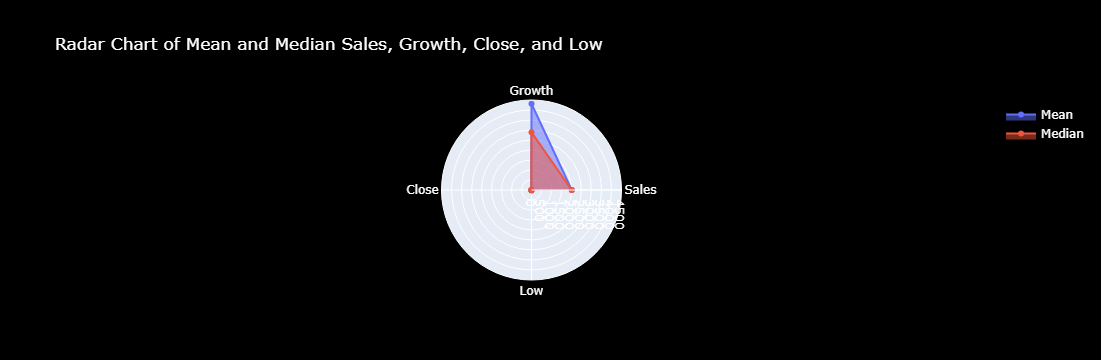

In [31]:

fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=df.mean(), theta=['Sales', 'Growth', 'Close', 'Low'], fill='toself', name='Mean'))
fig.add_trace(go.Scatterpolar(r=df.median(), theta=['Sales', 'Growth', 'Close', 'Low'], fill='toself', name='Median'))
fig.update_layout(title='Radar Chart of Mean and Median Sales, Growth, Close, and Low', polar=dict(radialaxis=dict(visible=True)), 
                  plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()


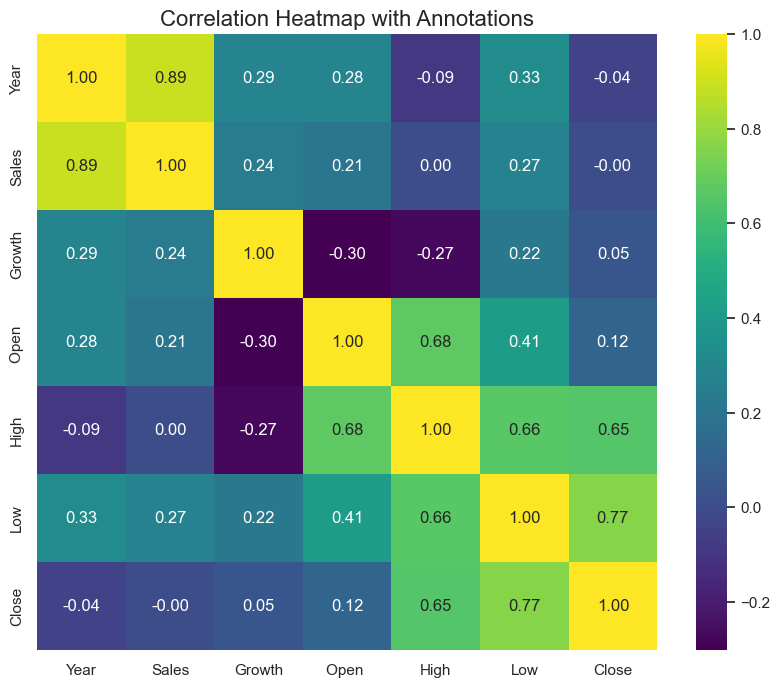

In [34]:

# 14. Heatmap with Annotations
sns.set(font_scale=1)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap with Annotations', fontsize=16)
plt.show()



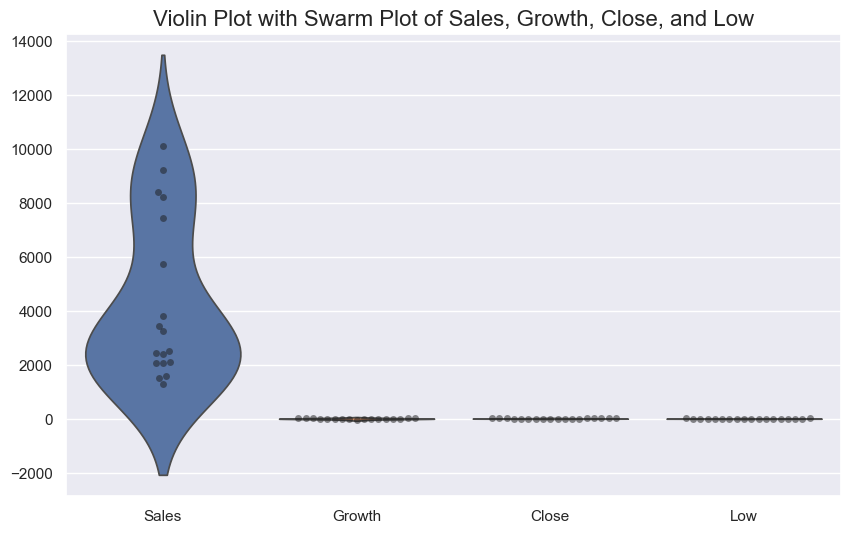

In [35]:
# 15. Violin Plot with Swarm Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['Sales', 'Growth', 'Close', 'Low']], inner=None)
sns.swarmplot(data=df[['Sales', 'Growth', 'Close', 'Low']], color='k', alpha=0.5)
plt.title('Violin Plot with Swarm Plot of Sales, Growth, Close, and Low', fontsize=16)
plt.show()
fig = px.choropleth(df, locations='Year', color='Sales', projection='natural earth')



In [37]:
model = LinearRegression()

In [40]:
# Fit the model to the data
model.fit(df[['Year']], df['Sales'])



LinearRegression()

In [42]:
# Generate future years starting from the next year after the maximum year in the dataset
future_years = np.array([[year] for year in range(df['Year'].max() + 1, df['Year'].max() + 50)])



In [43]:
# Predict the future of the target column for the specified future years
future_target = model.predict(future_years)



C:\Users\Jadiel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [45]:
# Calculate growth percentage
last_known_sales = df['Sales'].iloc[-1]
percent_growth = ((future_target - last_known_sales) / last_known_sales) * 100




In [46]:
# Create a DataFrame with future years as the index column and the predicted target values
future_df = pd.DataFrame({'Sales': future_target.flatten(), 'Growth': percent_growth.flatten()}, index=future_years.flatten())
future_df.index.name = 'Year'

In [47]:
future_df

Sales      Growth
Year                          
2024   9084.065359  -10.165493
2025   9585.733058   -5.204380
2026  10087.400757   -0.243268
2027  10589.068455    4.717845
2028  11090.736154    9.678957
2029  11592.403853   14.640070
2030  12094.071551   19.601182
2031  12595.739250   24.562295
2032  13097.406949   29.523407
2033  13599.074647   34.484520
2034  14100.742346   39.445632
2035  14602.410045   44.406745
2036  15104.077743   49.367857
2037  15605.745442   54.328970
2038  16107.413141   59.290082
2039  16609.080839   64.251195
2040  17110.748538   69.212308
2041  17612.416237   74.173420
2042  18114.083935   79.134533
2043  18615.751634   84.095645
2044  19117.419333   89.056758
2045  19619.087031   94.017870
2046  20120.754730   98.978983
2047  20622.422429  103.940095
2048  21124.090127  108.901208
2049  21625.757826  113.862320
2050  22127.425525  118.823433
2051  22629.093223  123.784545
2052  23130.760922  128.745658
2053  23632.428621  133.706770
2054  24134.096319  138.667883
2055  24635.764018  143.628995
2056  25137.431717  148.590108
2057  25639.099415  153.551220
2058  26140.767114  158.512333
2059  26642.434813  163.473446
2060  27144.102511  168.434558
2061  27645.770210  173.395671
2062  28147.437908  178.356783
2063  28649.105607  183.317896
2064  29150.773306  188.279008
2065  29652.441004  193.240121
2066  30154.108703  198.201233
2067  30655.776402  203.162346
2068  31157.444100  208.123458
2069  31659.111799  213.084571
2070  32160.779498  218.045683
2071  32662.447196  223.006796
2072  33164.114895  227.967908

In [49]:
actual_prediction=pd.read_csv('Lambo-Future.csv')
actual_prediction

Sales      Growth
0    9084.065359  -10.165493
1    9585.733058   -5.204380
2   10087.400757   -0.243268
3   10589.068455    4.717845
4   11090.736154    9.678957
5   11592.403853   14.640070
6   12094.071551   19.601182
7   12595.739250   24.562295
8   13097.406949   29.523407
9   13599.074647   34.484520
10  14100.742346   39.445632
11  14602.410045   44.406745
12  15104.077743   49.367857
13  15605.745442   54.328970
14  16107.413141   59.290082
15  16609.080839   64.251195
16  17110.748538   69.212308
17  17612.416237   74.173420
18  18114.083935   79.134533
19  18615.751634   84.095645
20  19117.419333   89.056758
21  19619.087031   94.017870
22  20120.754730   98.978983
23  20622.422429  103.940095
24  21124.090127  108.901208
25  21625.757826  113.862320
26  22127.425525  118.823433
27  22629.093223  123.784545
28  23130.760922  128.745658
29  23632.428621  133.706770
30  24134.096319  138.667883
31  24635.764018  143.628995
32  25137.431717  148.590108
33  25639.099415  153.551220
34  26140.767114  158.512333
35  26642.434813  163.473446
36  27144.102511  168.434558
37  27645.770210  173.395671
38  28147.437908  178.356783
39  28649.105607  183.317896
40  29150.773306  188.279008
41  29652.441004  193.240121
42  30154.108703  198.201233
43  30655.776402  203.162346
44  31157.444100  208.123458
45  31659.111799  213.084571
46  32160.779498  218.045683
47  32662.447196  223.006796
48  33164.114895  227.967908